Sources:
- https://www.kaggle.com/code/klyushnik/san-francisco-crimes-catboostclassifier
- https://www.kaggle.com/code/jaichaudhrani/crime-jai
- https://scottmduda.medium.com/san-francisco-crime-classification-9d5a1c4d7cfd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [17]:
train = pd.read_csv('../data/train.csv')

/var/folders/41/nzwfwwtn3kb7y13s4d_whpv00000gn/T/ipykernel_66351/349983387.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Category', data=train, palette='Paired', ax=ax, color = 'red')


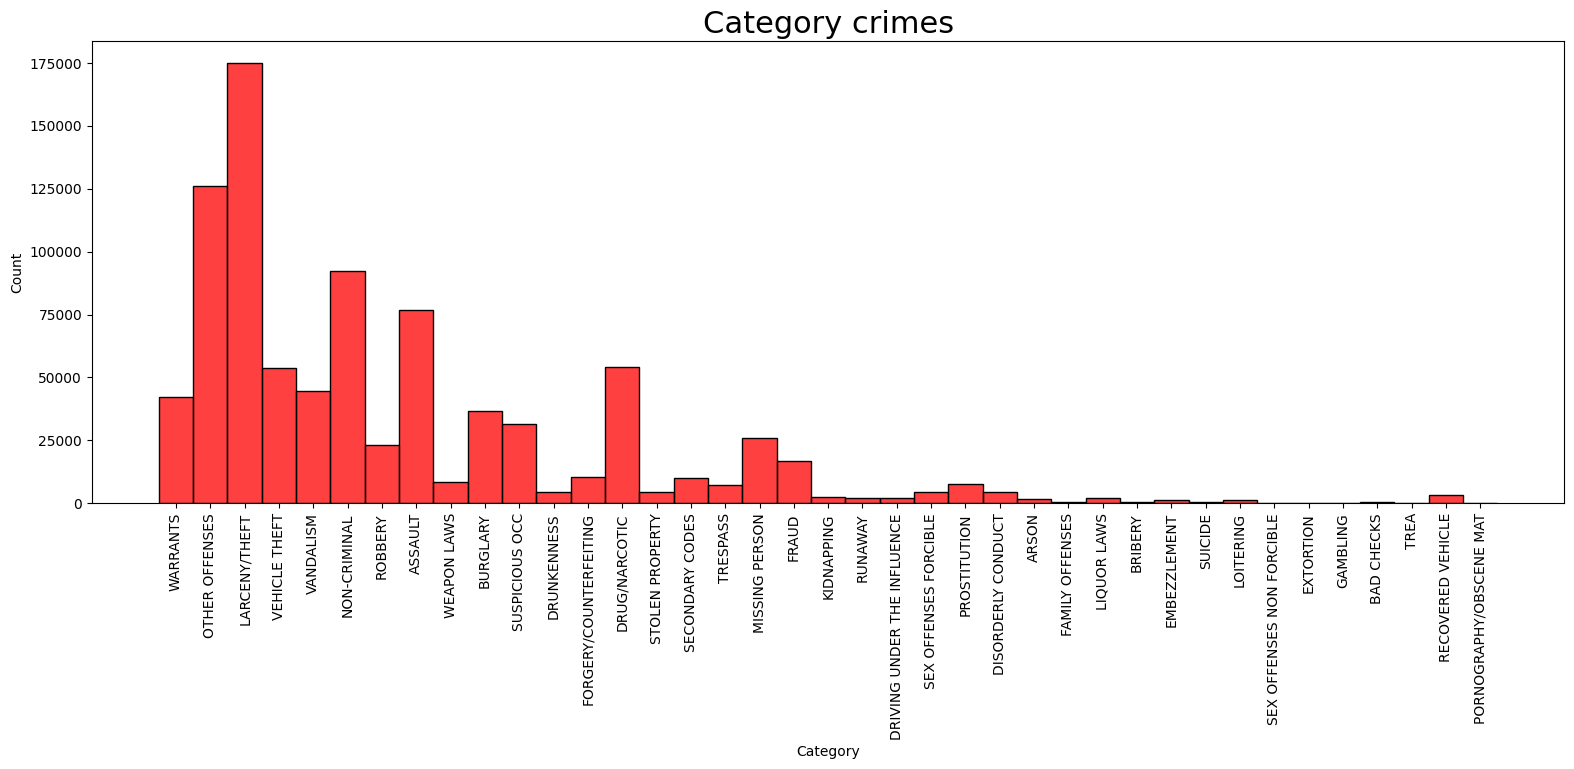

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='Category', data=train, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("Category crimes", fontsize=22)
plt.show()

/var/folders/41/nzwfwwtn3kb7y13s4d_whpv00000gn/T/ipykernel_65959/2920408962.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='PdDistrict', data=train, palette='Paired', ax=ax, color = 'red')


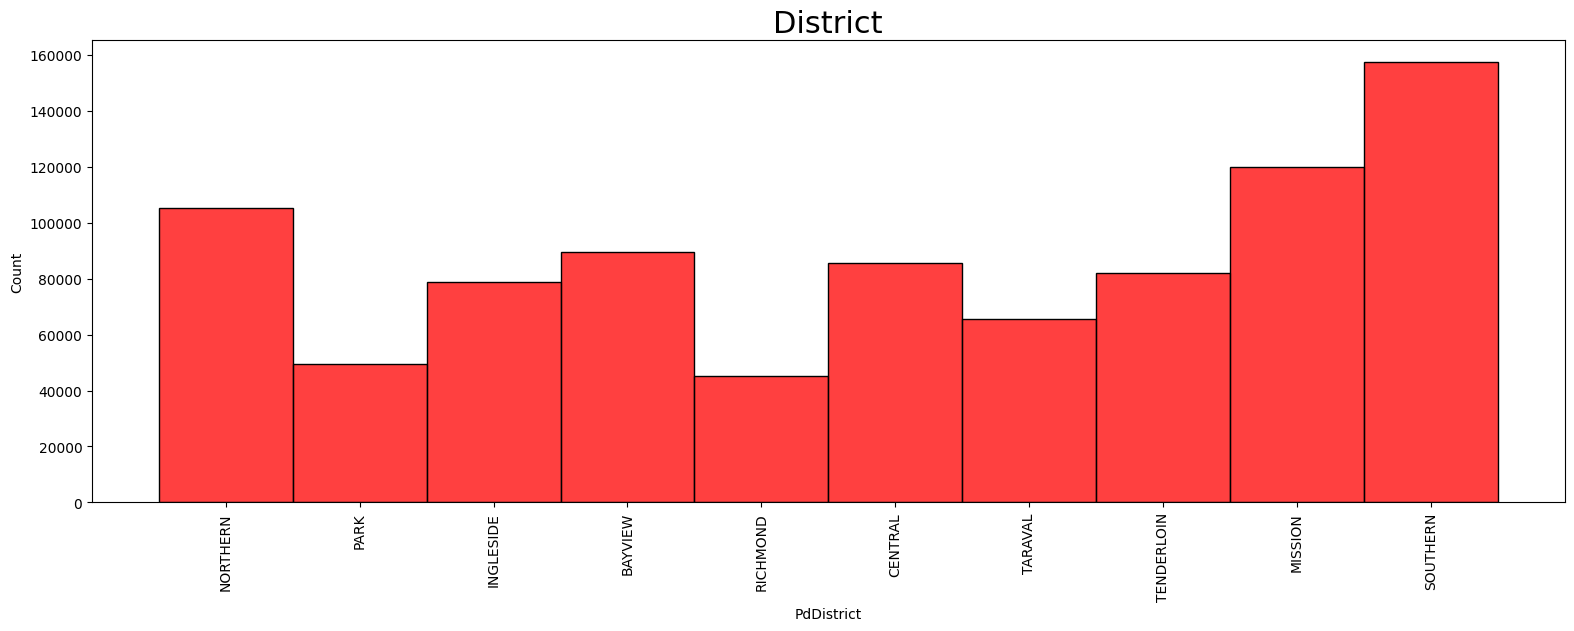

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='PdDistrict', data=train, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("District", fontsize=22)
plt.show()

/var/folders/41/nzwfwwtn3kb7y13s4d_whpv00000gn/T/ipykernel_65959/112685019.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Resolution', data=train, palette='Paired', ax=ax, color = 'red')


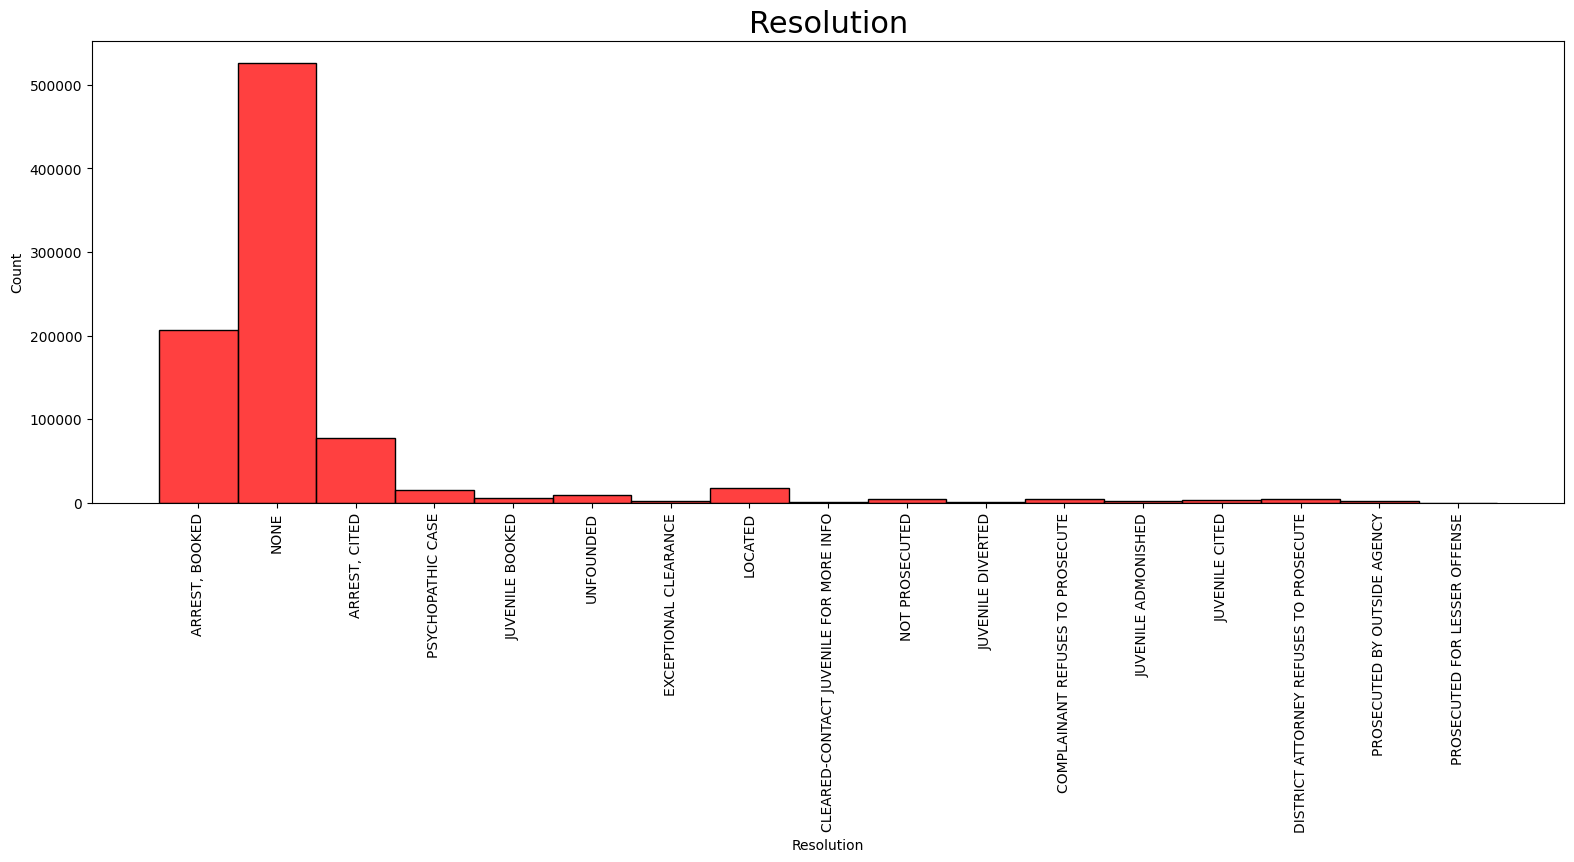

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='Resolution', data=train, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("Resolution", fontsize=22)
plt.show()

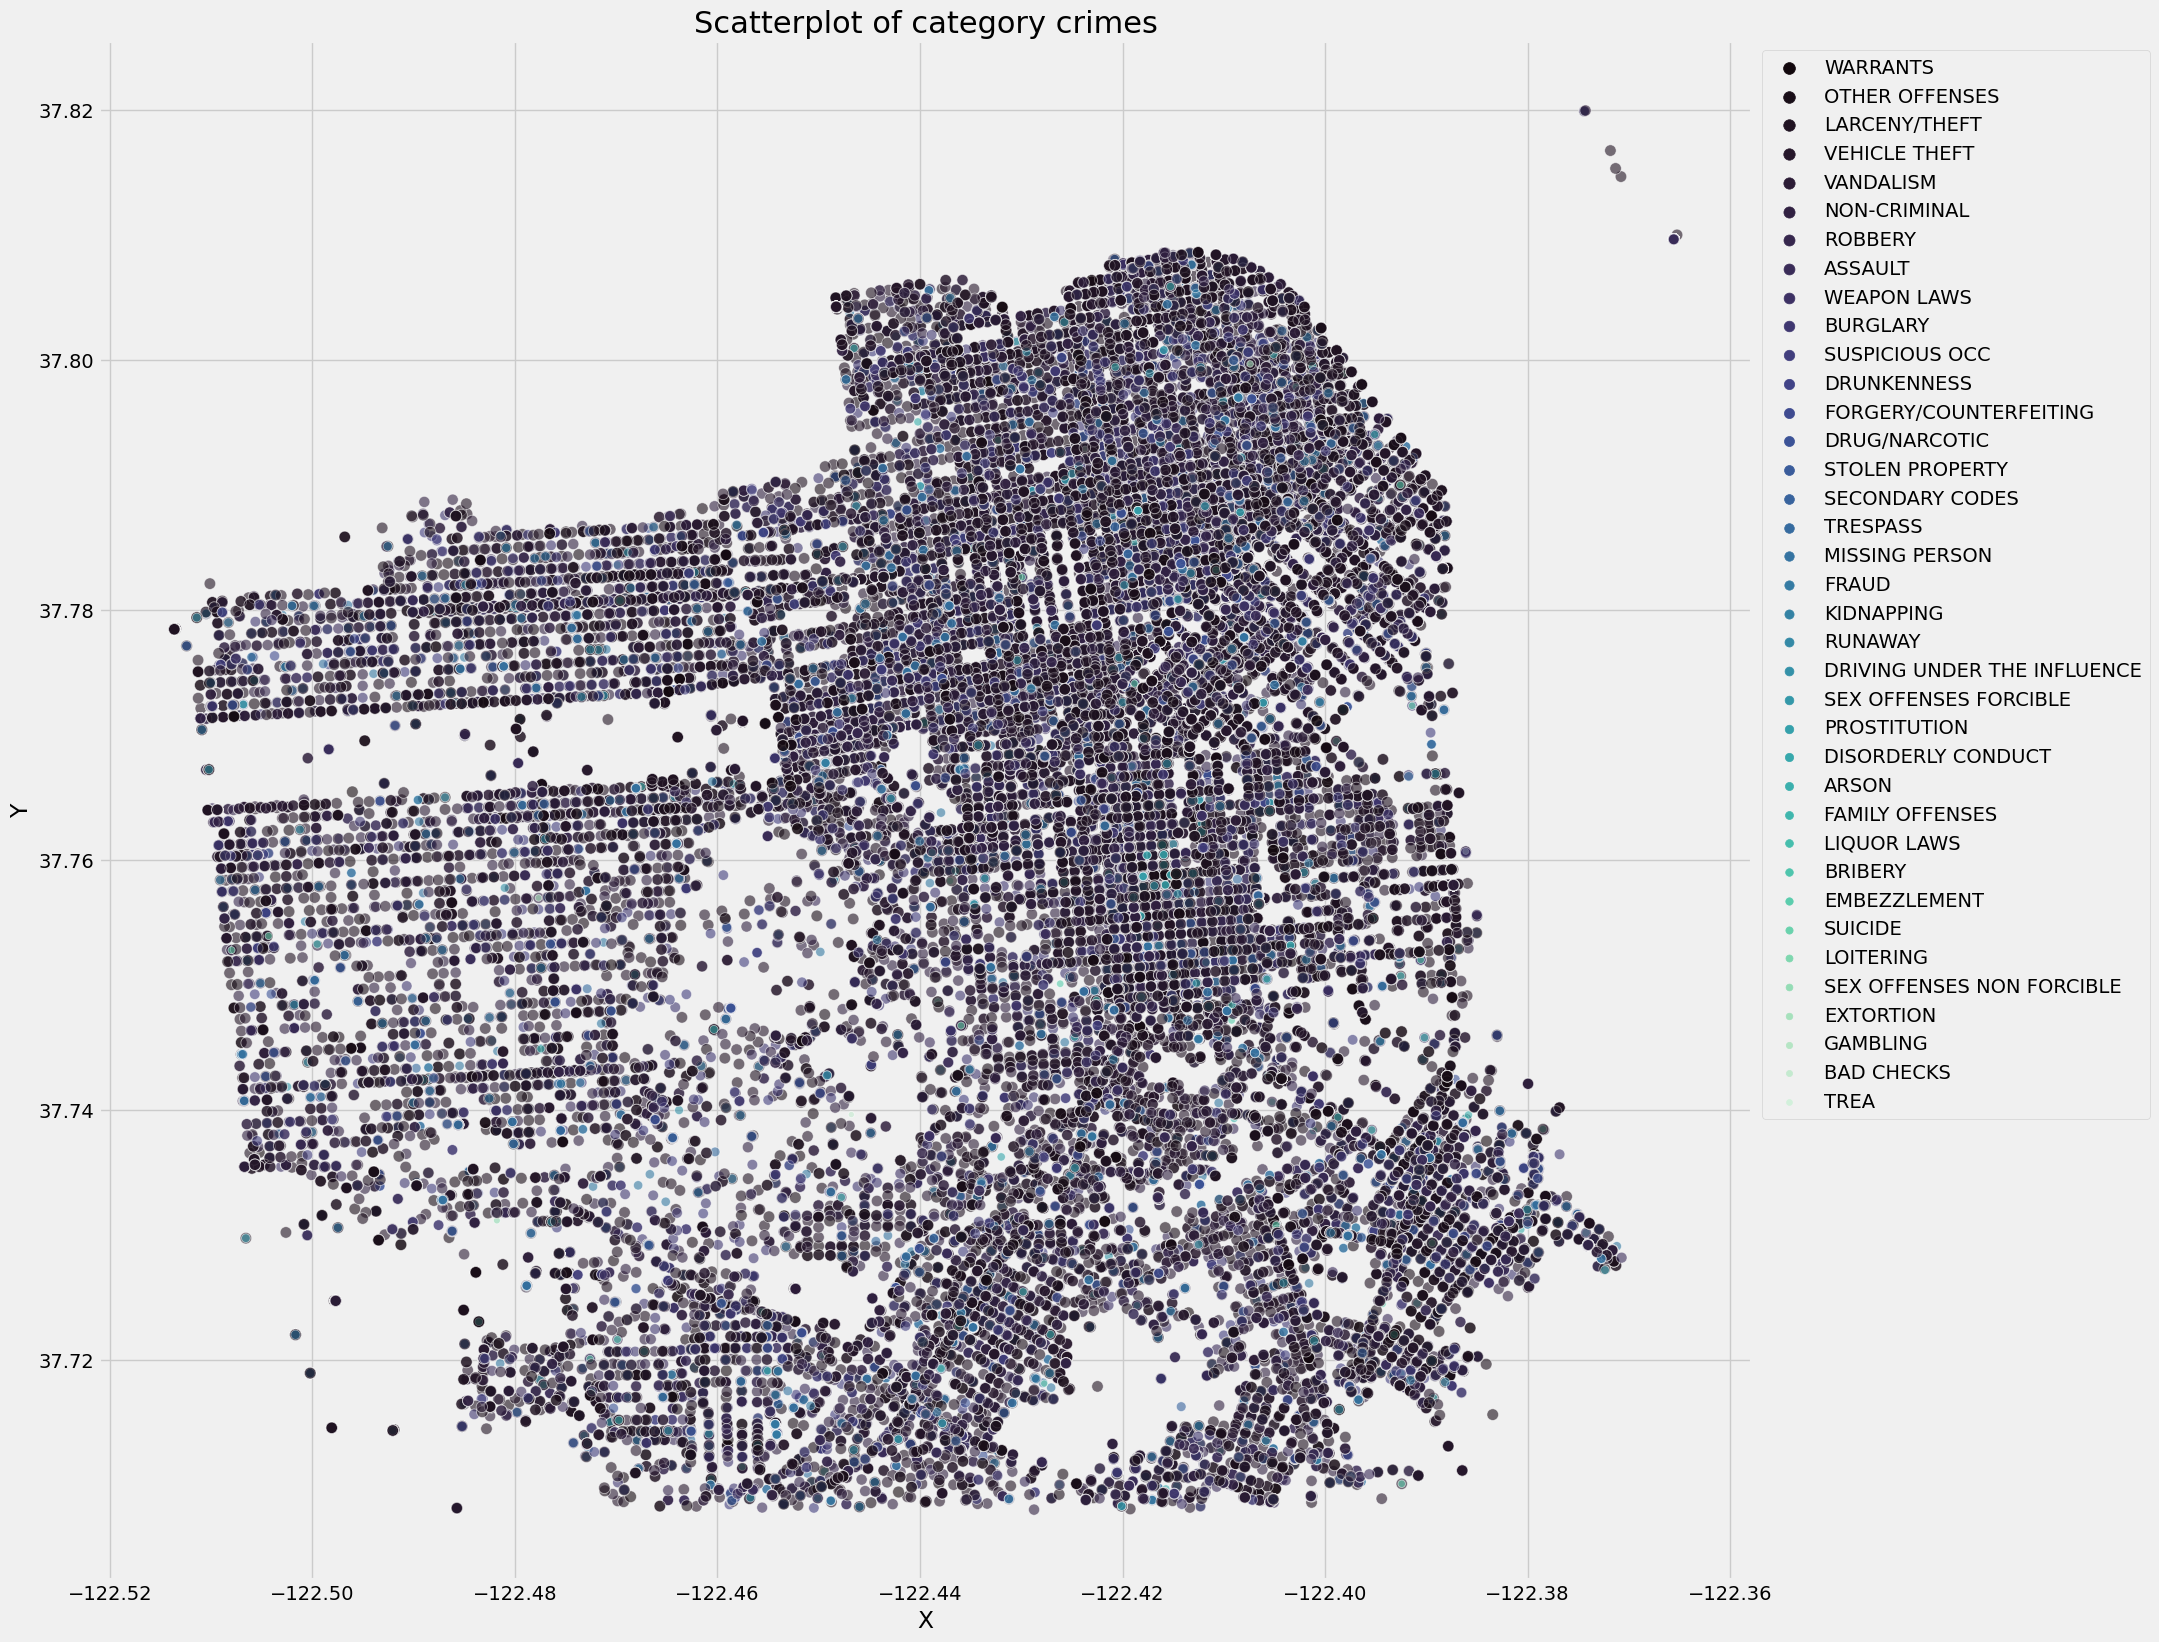

In [ ]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(19, 19))
    sns.scatterplot(data=train.iloc[:100_000], x='X', y='Y', alpha=0.6, palette='mako', hue='Category', size='Category')
    plt.title("Scatterplot of category crimes", fontsize=22)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

In [ ]:
print('Missing values train',train.isnull().sum(), sep='')

Missing values trainDates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


In [ ]:
train.head()

Dates        Category                      Descript   
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST  \
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address   
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST  \
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [ ]:
test_features = ['Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address']
for feature in test_features:
    train[feature] = train[feature].map(lambda x: x.lower())

In [ ]:
train.head()

Dates        Category                      Descript   
0  2015-05-13 23:53:00        WARRANTS                warrant arrest  \
1  2015-05-13 23:53:00  OTHER OFFENSES      traffic violation arrest   
2  2015-05-13 23:33:00  OTHER OFFENSES      traffic violation arrest   
3  2015-05-13 23:30:00   LARCENY/THEFT  grand theft from locked auto   
4  2015-05-13 23:30:00   LARCENY/THEFT  grand theft from locked auto   

   DayOfWeek PdDistrict      Resolution                    Address   
0  wednesday   northern  arrest, booked         oak st / laguna st  \
1  wednesday   northern  arrest, booked         oak st / laguna st   
2  wednesday   northern  arrest, booked  vanness av / greenwich st   
3  wednesday   northern            none   1500 block of lombard st   
4  wednesday       park            none  100 block of broderick st   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [ ]:
train['Dates'] = pd.to_datetime(train['Dates'])

train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day_of_month'] = train['Dates'].dt.day
train['day_of_week'] = train['Dates'].dt.day_of_week
train['hour'] = train['Dates'].dt.hour
# train.drop(['Dates', 'DayOfWeek'], axis = 1, inplace = True)
train.head(3)

Dates        Category                  Descript  DayOfWeek   
0 2015-05-13 23:53:00        WARRANTS            warrant arrest  wednesday  \
1 2015-05-13 23:53:00  OTHER OFFENSES  traffic violation arrest  wednesday   
2 2015-05-13 23:33:00  OTHER OFFENSES  traffic violation arrest  wednesday   

  PdDistrict      Resolution                    Address           X   
0   northern  arrest, booked         oak st / laguna st -122.425892  \
1   northern  arrest, booked         oak st / laguna st -122.425892   
2   northern  arrest, booked  vanness av / greenwich st -122.424363   

           Y  year  month  day_of_month  day_of_week  hour  
0  37.774599  2015      5            13            2    23  
1  37.774599  2015      5            13            2    23  
2  37.800414  2015      5            13            2    23

# Part 2

In [2]:
df_train = pd.read_csv('../data/train.csv', parse_dates=['Dates'])
print(f"first date covert: {df_train.Dates.sort_values().min()}")
print(f"last date: {df_train.Dates.sort_values().max()}")
df_train.shape

first date covert: 2003-01-06 00:01:00
last date: 2015-05-13 23:53:00


(878049, 9)

In [3]:
df_train.describe().T

count                           mean                  min   
Dates    878049  2009-03-16 08:25:41.991847168  2003-01-06 00:01:00  \
X      878049.0                    -122.422616          -122.513642   
Y      878049.0                       37.77102            37.707879   

                       25%                  50%                  75%   
Dates  2006-01-11 03:00:00  2009-03-07 16:00:00  2012-06-11 10:13:00  \
X              -122.432952           -122.41642          -122.406959   
Y                37.752427            37.775421            37.784369   

                       max       std  
Dates  2015-05-13 23:53:00       NaN  
X                   -120.5  0.030354  
Y                     90.0  0.456893

d:\University\Masters\Semester 2\Big Data Technologies and Analytics\San-Francisco-Crime-Classification-bigdata\venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\yusuf\AppData\Local\Temp\ipykernel_29708\1978732669.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


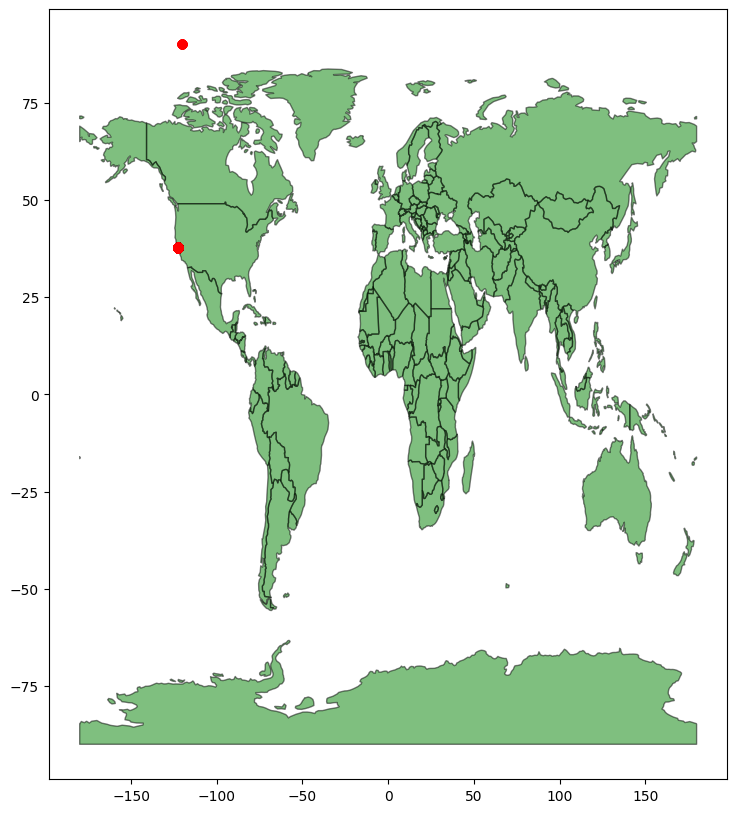

In [4]:
# Mark the points on the map (by latitude and longitude from the data) where exactly the crimes were committed:
import geopandas as gpd
from shapely.geometry import  Point

def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))
    gdf.Coordinates = gdf.Coordinates.apply(Point)
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

train_gdf = create_gdf(df_train)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(14,10), color='green', edgecolor='black', alpha=0.5)

train_gdf.plot(ax=ax, color='red')
plt.show()

"All coordinates from the dataset are grouped into two red dots on the map. The lower group of points is located in the San Francisco area, and the upper group of points does not fall on land on the map, it seems that this is some kind of extra or incorrect data. Let's see how many points got there (we see that the points lie above the longitude of 50.0):All coordinates from the dataset are grouped into two red dots on the map. The lower group of points is located in the San Francisco area, and the upper group of points does not fall on land on the map, it seems that this is some kind of extra or incorrect data. Let's see how many points got there (we see that the points lie above the longitude of 50.0):"

"There are 67 such points in the train, and there are even more of them in the test - 76 positions, all these outliers have the same coordinates x=-120.5, y=90.0. Longitude -120.5 corresponds to the longitude of the city of San Francisco, and latitude 90.0 is somewhere at the North Pole, which confirms the idea of erroneous data in the coordinates.There are 67 such points in the train, and there are even more of them in the test - 76 positions, all these outliers have the same coordinates x=-120.5, y=90.0. Longitude -120.5 corresponds to the longitude of the city of San Francisco, and latitude 90.0 is somewhere at the North Pole, which confirms the idea of erroneous data in the coordinates."

In [5]:
print(train_gdf.loc[train_gdf.Y > 50].count()[0])
train_gdf.loc[train_gdf.Y > 50].sample(5)

67


Dates               Category   
767318 2004-06-24 13:00:00         OTHER OFFENSES  \
678539 2005-10-03 18:46:00         OTHER OFFENSES   
852880 2003-05-02 01:00:00  SEX OFFENSES FORCIBLE   
685719 2005-08-25 09:26:00               WARRANTS   
857248 2003-04-14 16:30:00                ROBBERY   

                                  Descript DayOfWeek  PdDistrict   
767318                   TRAFFIC VIOLATION  Thursday     MISSION  \
678539  VIOLATION OF MUNICIPAL POLICE CODE    Monday  TENDERLOIN   
852880         FORCIBLE RAPE, BODILY FORCE    Friday    SOUTHERN   
685719                      WARRANT ARREST  Thursday  TENDERLOIN   
857248    ROBBERY ON THE STREET, STRONGARM    Monday     BAYVIEW   

                              Resolution                         Address   
767318                     ARREST, CITED         FLORIDA ST / ALAMEDA ST  \
678539                     ARREST, CITED   7THSTNORTH ST / MCALLISTER ST   
852880  COMPLAINANT REFUSES TO PROSECUTE  3RD ST / JAMES LICK FREEWAY HY   
685719                    ARREST, BOOKED         5THSTNORTH ST / EDDY ST   
857248  COMPLAINANT REFUSES TO PROSECUTE            GILMAN AV / FITCH ST   

            X     Y                  Coordinates  
767318 -120.5  90.0  POINT (-120.50000 90.00000)  
678539 -120.5  90.0  POINT (-120.50000 90.00000)  
852880 -120.5  90.0  POINT (-120.50000 90.00000)  
685719 -120.5  90.0  POINT (-120.50000 90.00000)  
857248 -120.5  90.0  POINT (-120.50000 90.00000)

In [6]:
# Are there any duplicates in our training set?

df_train.duplicated().sum()

2323

In [7]:
# Remove duplicates and lines with erroneous coordinates:

df_train.drop_duplicates(inplace=True)
df_train = df_train.drop(df_train[(df_train.Y > 50)].index)
df_train.shape

(875659, 9)

In [8]:
# Sort data from a common file with a specific area and address
train_gdf.loc[(train_gdf.PdDistrict == 'TENDERLOIN') & (train_gdf.Address == '7THSTNORTH ST / MCALLISTER ST')]

Dates        Category   
677036 2005-10-07 08:35:00    NON-CRIMINAL  \
678539 2005-10-03 18:46:00  OTHER OFFENSES   
678540 2005-10-03 18:46:00    NON-CRIMINAL   

                                  Descript DayOfWeek  PdDistrict   
677036                      FOUND PROPERTY    Friday  TENDERLOIN  \
678539  VIOLATION OF MUNICIPAL POLICE CODE    Monday  TENDERLOIN   
678540         PROPERTY FOR IDENTIFICATION    Monday  TENDERLOIN   

           Resolution                        Address      X     Y   
677036      UNFOUNDED  7THSTNORTH ST / MCALLISTER ST -120.5  90.0  \
678539  ARREST, CITED  7THSTNORTH ST / MCALLISTER ST -120.5  90.0   
678540  ARREST, CITED  7THSTNORTH ST / MCALLISTER ST -120.5  90.0   

                        Coordinates  
677036  POINT (-120.50000 90.00000)  
678539  POINT (-120.50000 90.00000)  
678540  POINT (-120.50000 90.00000)

In [9]:
# Sort data from a file in 67 lines by specific areas and addresses

train_gdf.loc[(train_gdf.Y > 50)].sort_values(['PdDistrict','Address']).sample(5)

Dates        Category   
842261 2003-06-25 07:30:00   VEHICLE THEFT  \
677268 2005-10-06 17:30:00   VEHICLE THEFT   
844995 2003-06-11 08:49:00  OTHER OFFENSES   
788575 2004-03-17 01:16:00  OTHER OFFENSES   
783919 2004-04-03 20:52:00  OTHER OFFENSES   

                                     Descript  DayOfWeek PdDistrict   
842261               VEHICLE, RECOVERED, AUTO  Wednesday   RICHMOND  \
677268               VEHICLE, RECOVERED, AUTO   Thursday   RICHMOND   
844995  DRIVERS LICENSE, SUSPENDED OR REVOKED  Wednesday  INGLESIDE   
788575        MISCELLANEOUS STATE MISDEMEANOR  Wednesday   NORTHERN   
783919  DRIVERS LICENSE, SUSPENDED OR REVOKED   Saturday   SOUTHERN   

            Resolution                                       Address      X   
842261            NONE  JOHN F KENNEDY DR / MARTIN LUTHER KING JR DR -120.5  \
677268            NONE               AVENUE OF THE PALMS / EUCLID AV -120.5   
844995   ARREST, CITED       JAMES LICK FREEWAY HY / CESAR CHAVEZ ST -120.5   
788575  ARREST, BOOKED                         LARKIN ST / AUSTIN ST -120.5   
783919   ARREST, CITED                JAMES LICK FREEWAY HY / 4TH ST -120.5   

           Y                  Coordinates  
842261  90.0  POINT (-120.50000 90.00000)  
677268  90.0  POINT (-120.50000 90.00000)  
844995  90.0  POINT (-120.50000 90.00000)  
788575  90.0  POINT (-120.50000 90.00000)  
783919  90.0  POINT (-120.50000 90.00000)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875659 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       875659 non-null  datetime64[ns]
 1   Category    875659 non-null  object        
 2   Descript    875659 non-null  object        
 3   DayOfWeek   875659 non-null  object        
 4   PdDistrict  875659 non-null  object        
 5   Resolution  875659 non-null  object        
 6   Address     875659 non-null  object        
 7   X           875659 non-null  float64       
 8   Y           875659 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 66.8+ MB


In [11]:
# Let's see how many crimes per day were committed in San Francisco:

df_train['Date'] = df_train.Dates.dt.date   # I select the date column from the data
#(initially I had to transfer the data from this column from object to datetime64)
data = df_train.groupby('Date').count().iloc[:, 0]
data.describe()

count    2249.000000
mean      389.354824
std        48.506406
min         2.000000
25%       360.000000
50%       389.000000
75%       420.000000
max       650.000000
Name: Dates, dtype: float64

C:\Users\yusuf\AppData\Local\Temp\ipykernel_29708\48001137.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, shade=True, color='g')


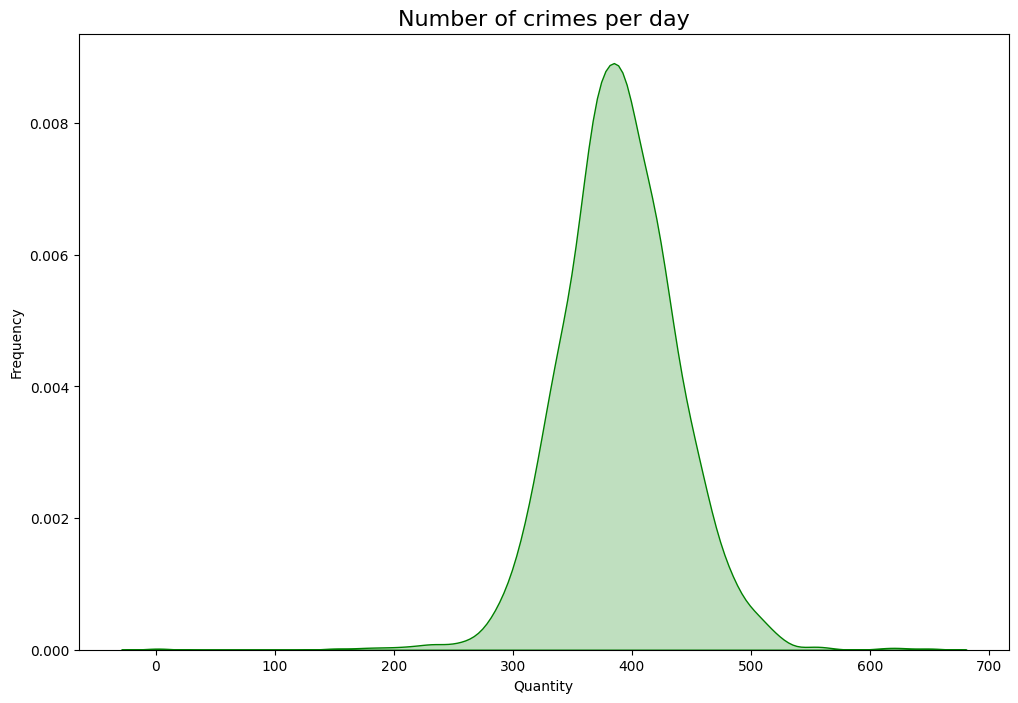

In [12]:
# On the graph we see the normal distribution:

col = sns.color_palette()

plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, shade=True, color='g')

plt.title('Number of crimes per day', fontdict={'fontsize': 16})
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.show()

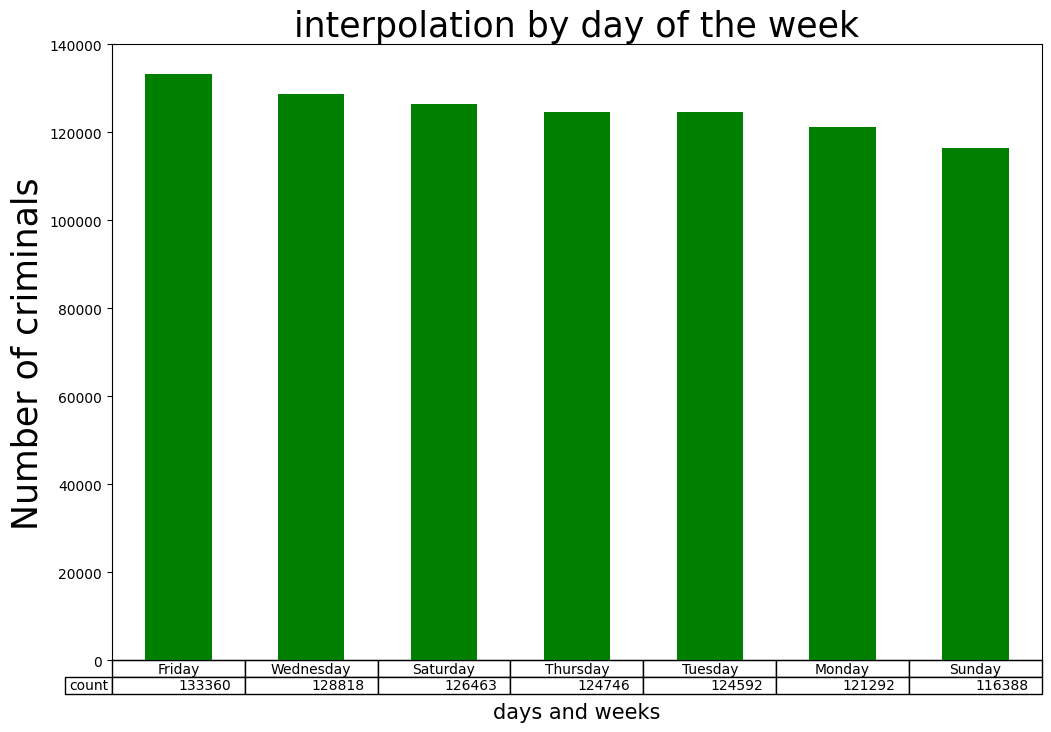

count         7.000000
mean     125094.142857
std        5395.860155
min      116388.000000
25%      122942.000000
50%      124746.000000
75%      127640.500000
max      133360.000000
Name: count, dtype: float64

In [23]:
# Let's group the data by days of the week and see how they look on the chart:

week = df_train['DayOfWeek'].value_counts()
week.plot(kind="bar",figsize=(12,8), table=True,  color='g')

plt.xticks([])
plt.xlabel('days and weeks',fontsize=15,labelpad=30)
plt.ylabel('Number of criminals',fontsize=25)
plt.title('interpolation by day of the week',fontsize=25)
plt.savefig('../output/images/interpolation_by_day_of_the_week.png')

plt.show()

week.describe()

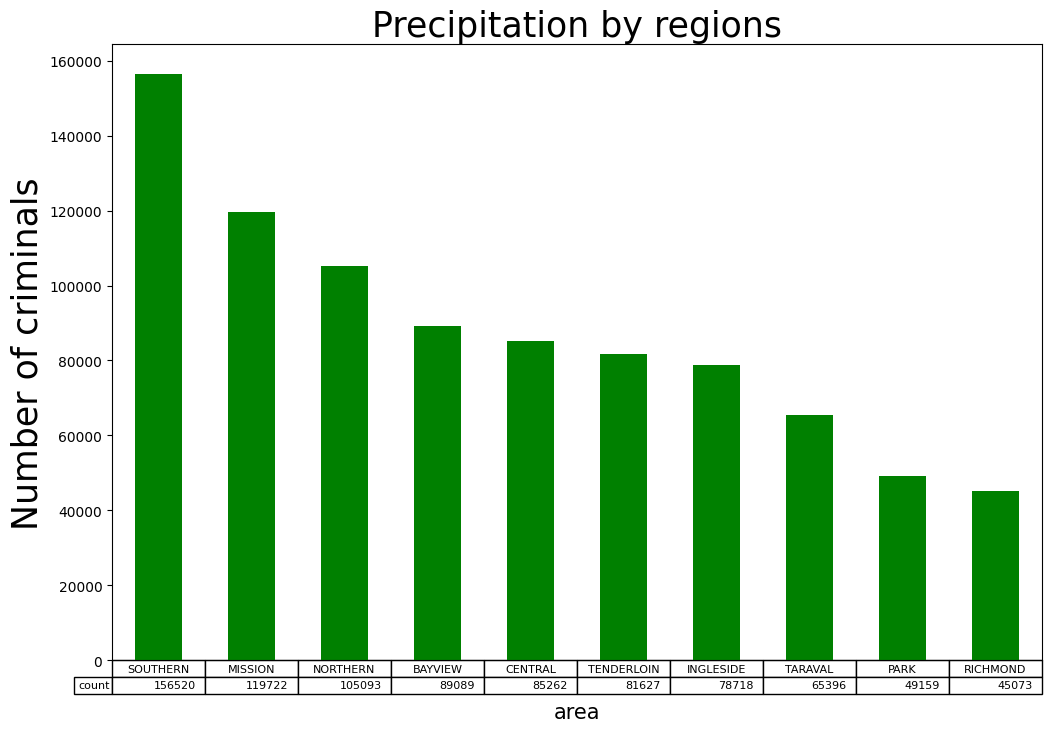

count        10.000000
mean      87565.900000
std       33315.506148
min       45073.000000
25%       68726.500000
50%       83444.500000
75%      101092.000000
max      156520.000000
Name: count, dtype: float64

In [24]:
# Estimate the number of crimes by district

dist = df_train["PdDistrict"].value_counts()
dist.plot(kind="bar",figsize=(12,8), table=True,  color='g')

plt.xticks([])
plt.xlabel('area',fontsize=15,labelpad=30)
plt.ylabel('Number of criminals',fontsize=25)
plt.title('Precipitation by regions',fontsize=25)
plt.savefig('../output/images/Precipitation by regions')

plt.show()

dist.describe()

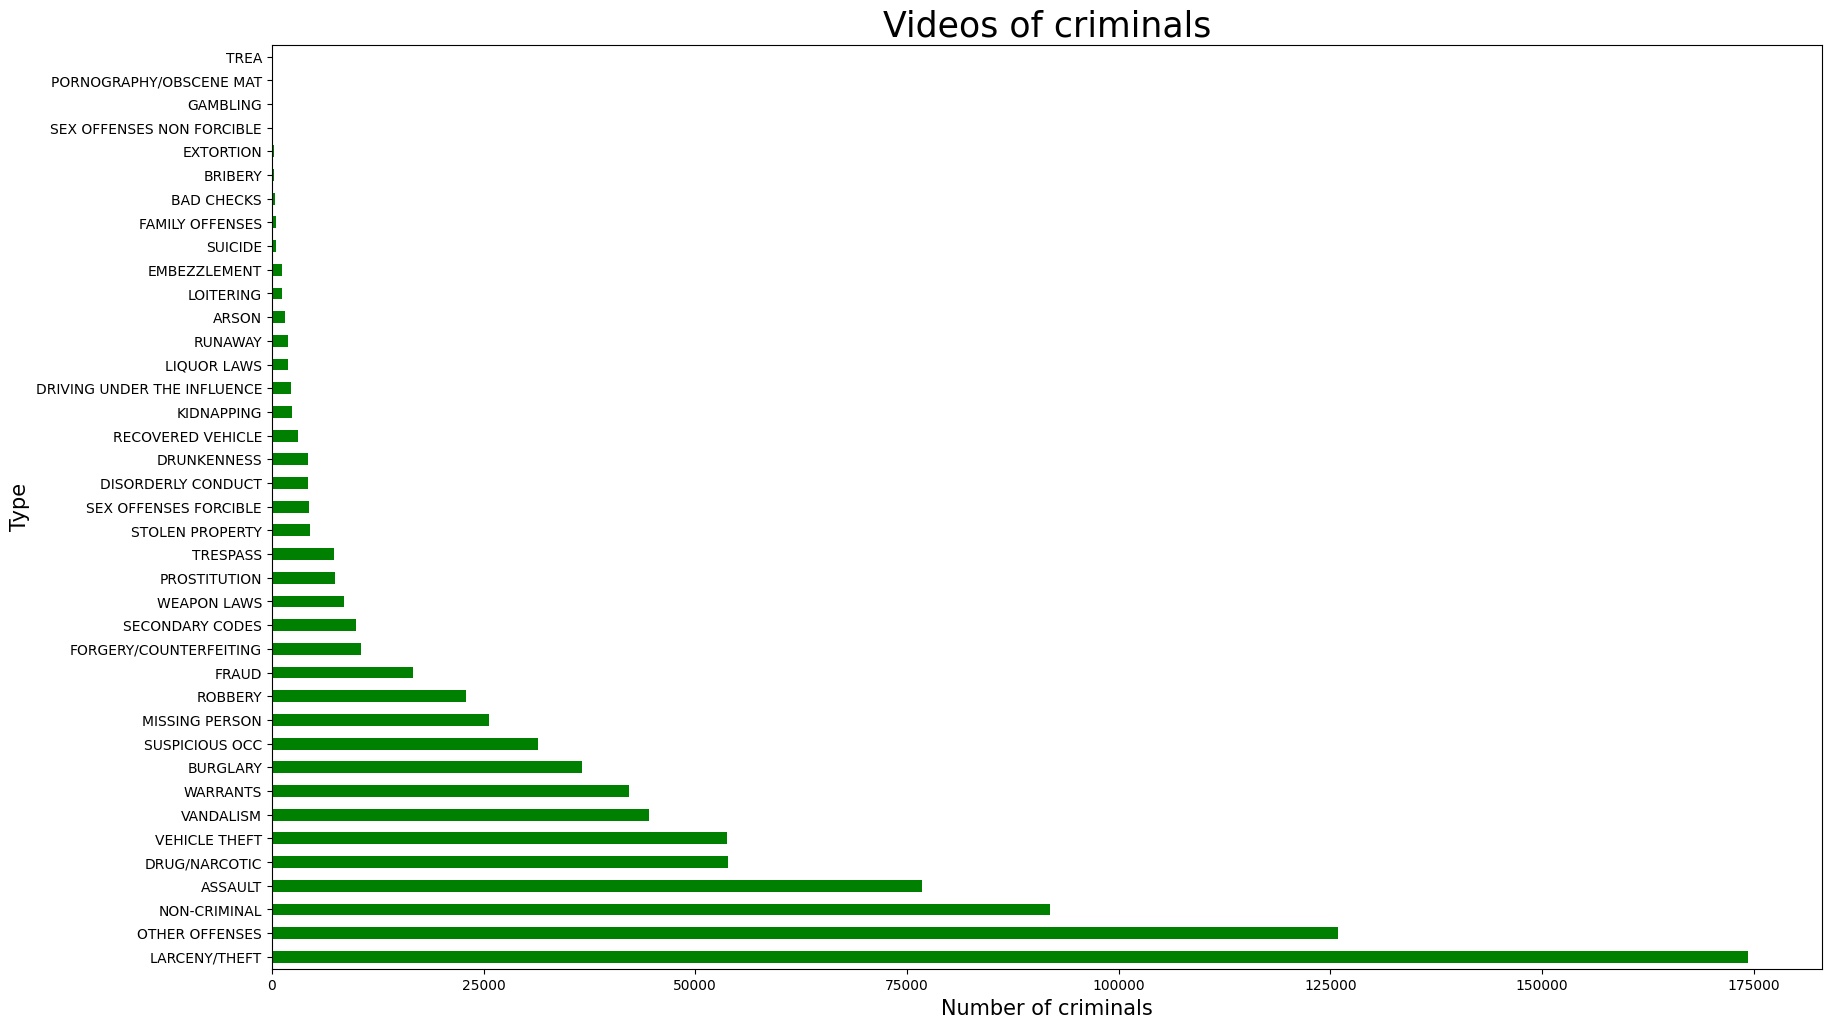

In [15]:
# Let's estimate which crimes most often occur in San Francisco:

kind = df_train['Category'].value_counts()

kind.plot(kind="barh",figsize=(20,12),  color='g')

plt.ylabel('Type',fontsize=15)
plt.xlabel('Number of criminals',fontsize=15)
plt.title('Videos of criminals',fontsize=25)
plt.show()

In [16]:
kind

Category
LARCENY/THEFT                  174305
OTHER OFFENSES                 125943
NON-CRIMINAL                    91911
ASSAULT                         76811
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53697
VANDALISM                       44580
WARRANTS                        42137
BURGLARY                        36599
SUSPICIOUS OCC                  31392
MISSING PERSON                  25669
ROBBERY                         22987
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7317
STOLEN PROPERTY                  4536
SEX OFFENSES FORCIBLE            4379
DISORDERLY CONDUCT               4311
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUN

C:\Users\yusuf\AppData\Local\Temp\ipykernel_29708\2502779012.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=kind, shade=True, color='g')


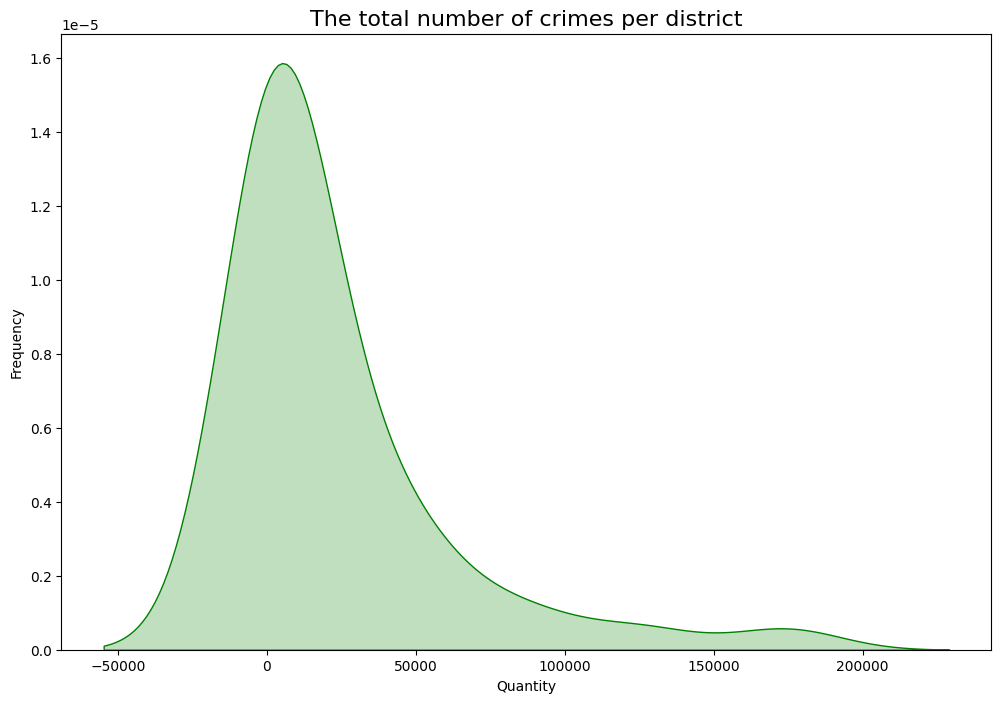

In [17]:
# Let's see how the number of crimes by district looks like on the graph:

plt.figure(figsize=(12, 8))
sns.kdeplot(data=kind, shade=True, color='g')

plt.title('The total number of crimes per district', fontdict={'fontsize': 16})
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.show()

In [18]:
df_train

Dates                Category   
0      2015-05-13 23:53:00                WARRANTS  \
1      2015-05-13 23:53:00          OTHER OFFENSES   
2      2015-05-13 23:33:00          OTHER OFFENSES   
3      2015-05-13 23:30:00           LARCENY/THEFT   
4      2015-05-13 23:30:00           LARCENY/THEFT   
...                    ...                     ...   
878044 2003-01-06 00:15:00                 ROBBERY   
878045 2003-01-06 00:01:00           LARCENY/THEFT   
878046 2003-01-06 00:01:00           LARCENY/THEFT   
878047 2003-01-06 00:01:00               VANDALISM   
878048 2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek PdDistrict   
0                                  WARRANT ARREST  Wednesday   NORTHERN  \
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
...                                           ...        ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN     Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO     Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO     Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)     Monday    BAYVIEW   

            Resolution                     Address           X          Y   
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  \
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599   
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414   
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873   
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541   
...                ...                         ...         ...        ...   
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056   
878045            NONE        600 Block of EDNA ST -122.447364  37.731948   
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266   
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607   
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212   

              Date  
0       2015-05-13  
1       2015-05-13  
2       2015-05-13  
3       2015-05-13  
4       2015-05-13  
...            ...  
878044  2003-01-06  
878045  2003-01-06  
878046  2003-01-06  
878047  2003-01-06  
878048  2003-01-06  

[875659 rows x 10 columns]

In [22]:
# Visual breakdown of categories of crimes by their number TOP-10 categories:
# ! pip install -U kaleido
import plotly.express as px
cats = df_train["Category"].value_counts()[:10]
# cats['OTHER 29 pos'] = df_train["Category"].value_counts()[11:].sum()
label = cats[0]
cats = pd.DataFrame(cats).reset_index()
print(cats)
# cats.rename(columns={'index': 'Category', 'Category': 'Count'}, inplace=True)
cats.index += 1
label = cats['Category']
fig = px.pie(names=label, values=cats['count'], height=600, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=12, )
fig.update_layout(title_text = 'TOP-10 Category of criminals',
                  title_font = dict(size=20, family='Verdana', color='black'))
fig.write_image('../output/images/TOP-10_Category_of_criminals.png')
fig.show()

         Category   count
0   LARCENY/THEFT  174305
1  OTHER OFFENSES  125943
2    NON-CRIMINAL   91911
3         ASSAULT   76811
4   DRUG/NARCOTIC   53919
5   VEHICLE THEFT   53697
6       VANDALISM   44580
7        WARRANTS   42137
8        BURGLARY   36599
9  SUSPICIOUS OCC   31392


In [26]:
df_train['Hour'] = df_train.Dates.dt.hour   # I select the date column from the data
#(initially I had to transfer the data from this column from object to datetime64)

In [27]:
# We can estimate how many crimes happened in certain periods of time, for example from 20 to 23:
df_train.loc[(df_train.Hour >= 20) & (df_train.Hour <= 23)].count()

Dates         176082
Category      176082
Descript      176082
DayOfWeek     176082
PdDistrict    176082
Resolution    176082
Address       176082
X             176082
Y             176082
Date          176082
Hour          176082
dtype: int64

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875659 entries, 0 to 878048
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       875659 non-null  datetime64[ns]
 1   Category    875659 non-null  object        
 2   Descript    875659 non-null  object        
 3   DayOfWeek   875659 non-null  object        
 4   PdDistrict  875659 non-null  object        
 5   Resolution  875659 non-null  object        
 6   Address     875659 non-null  object        
 7   X           875659 non-null  float64       
 8   Y           875659 non-null  float64       
 9   Date        875659 non-null  object        
 10  Hour        875659 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(7)
memory usage: 76.8+ MB


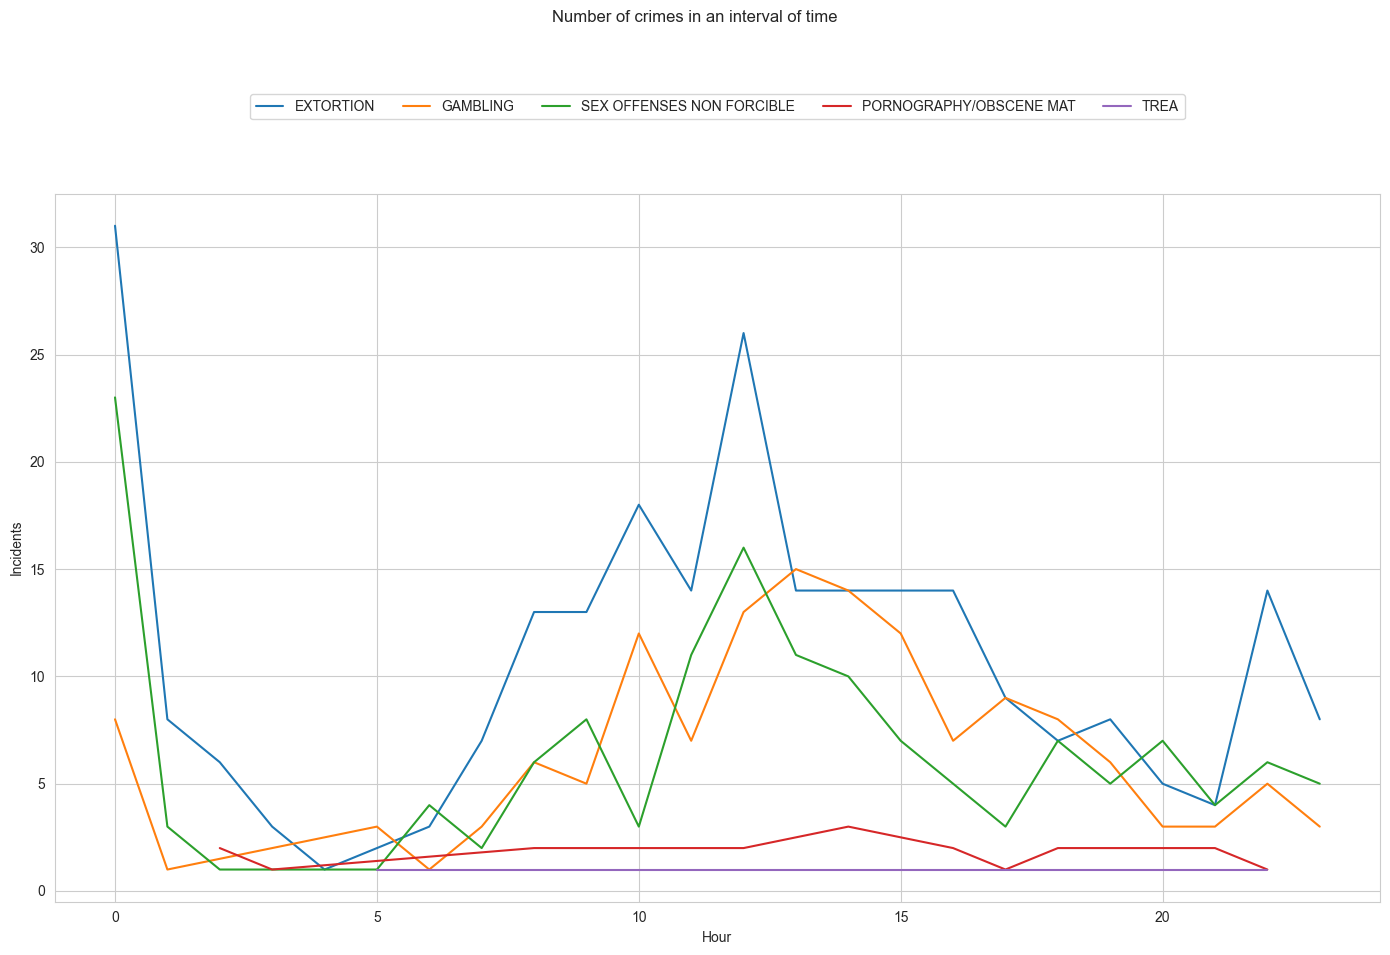

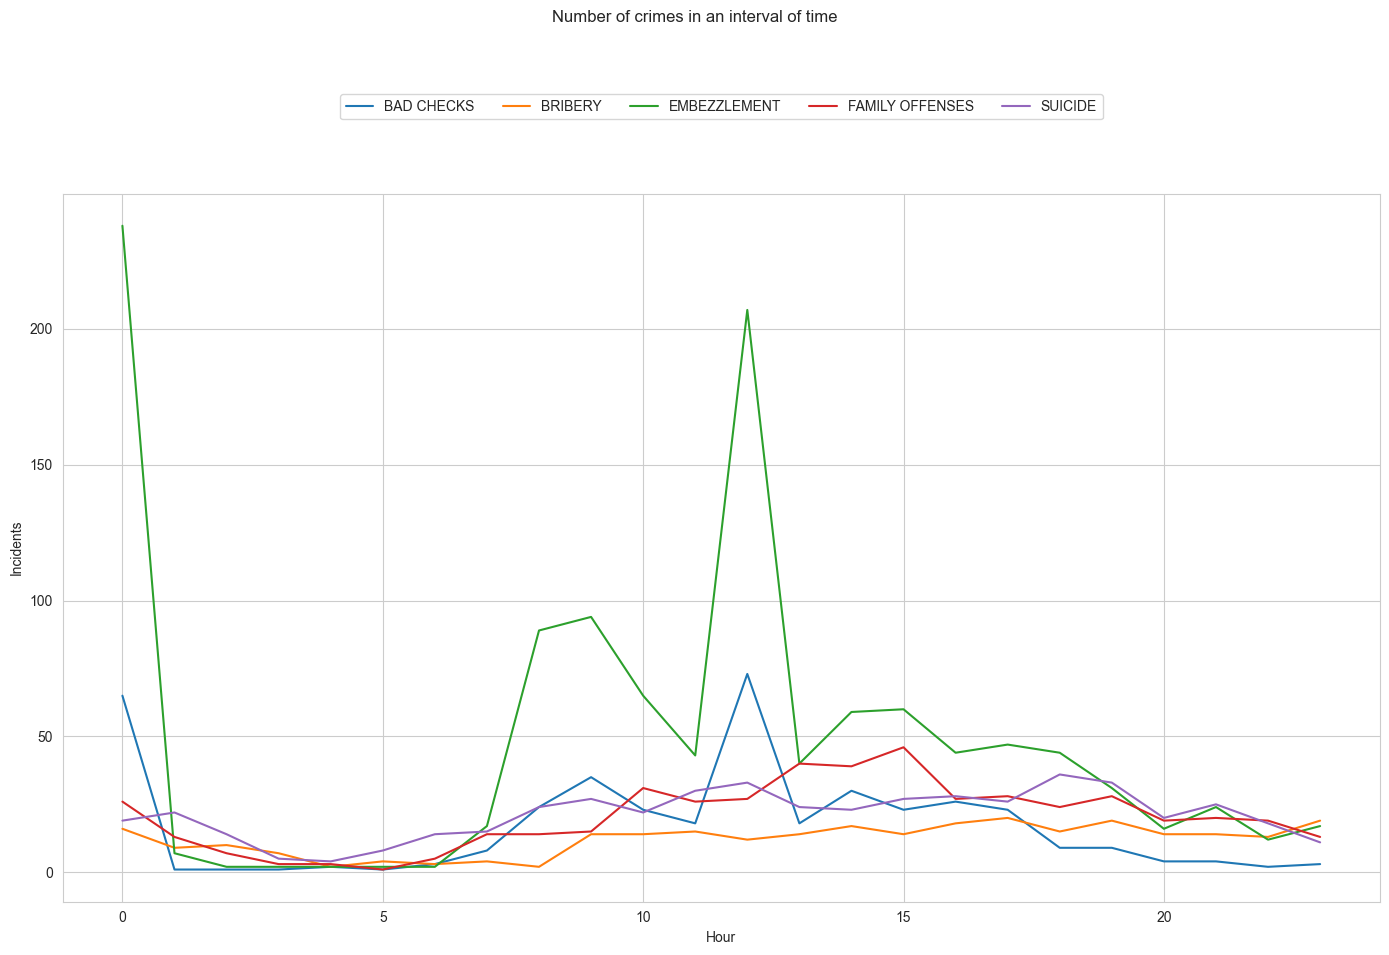

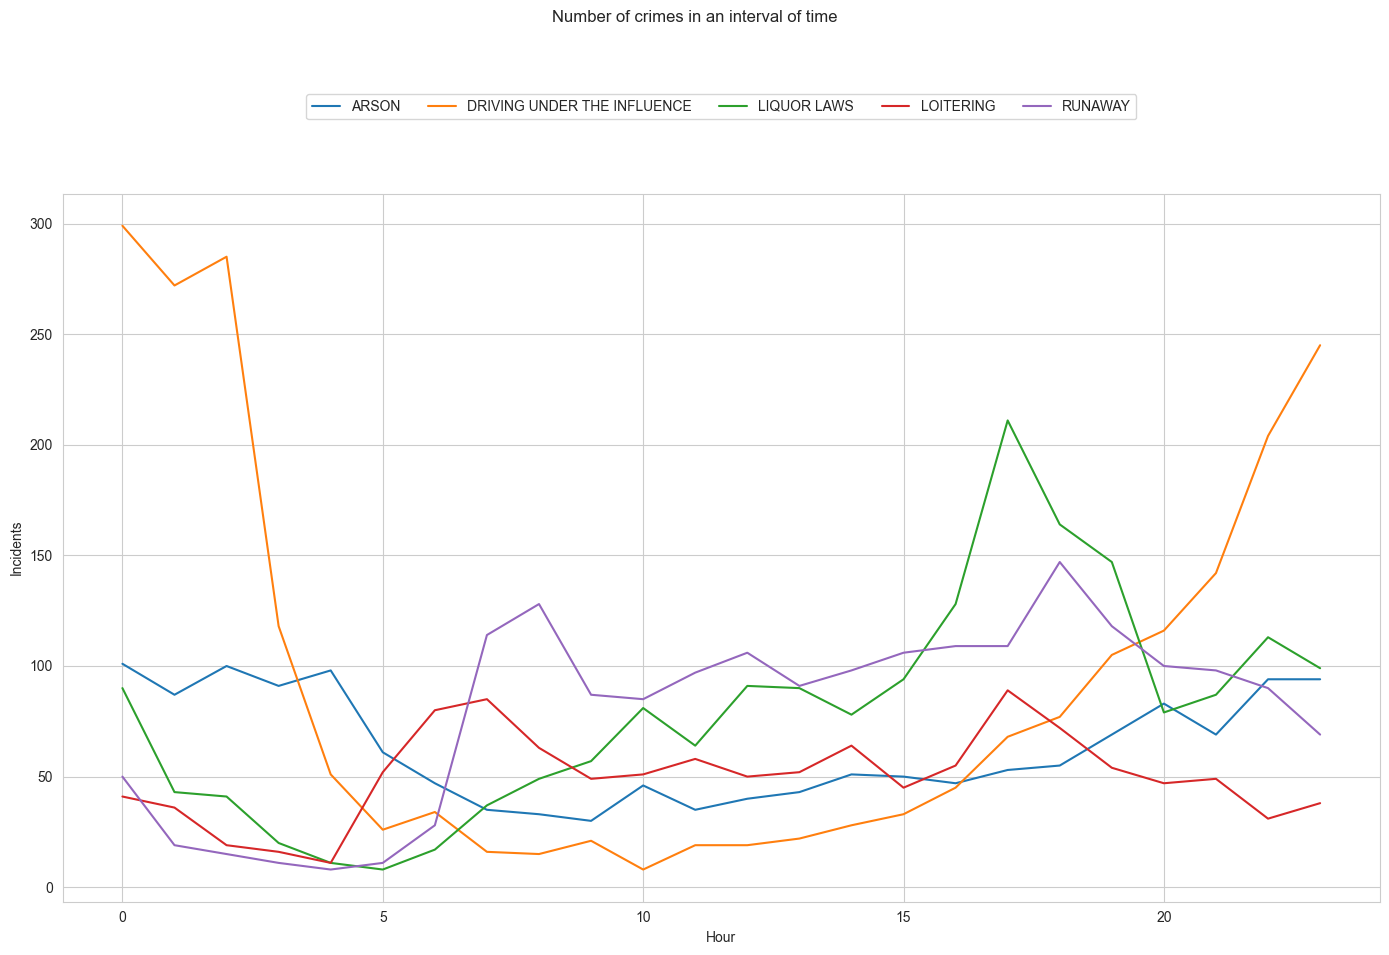

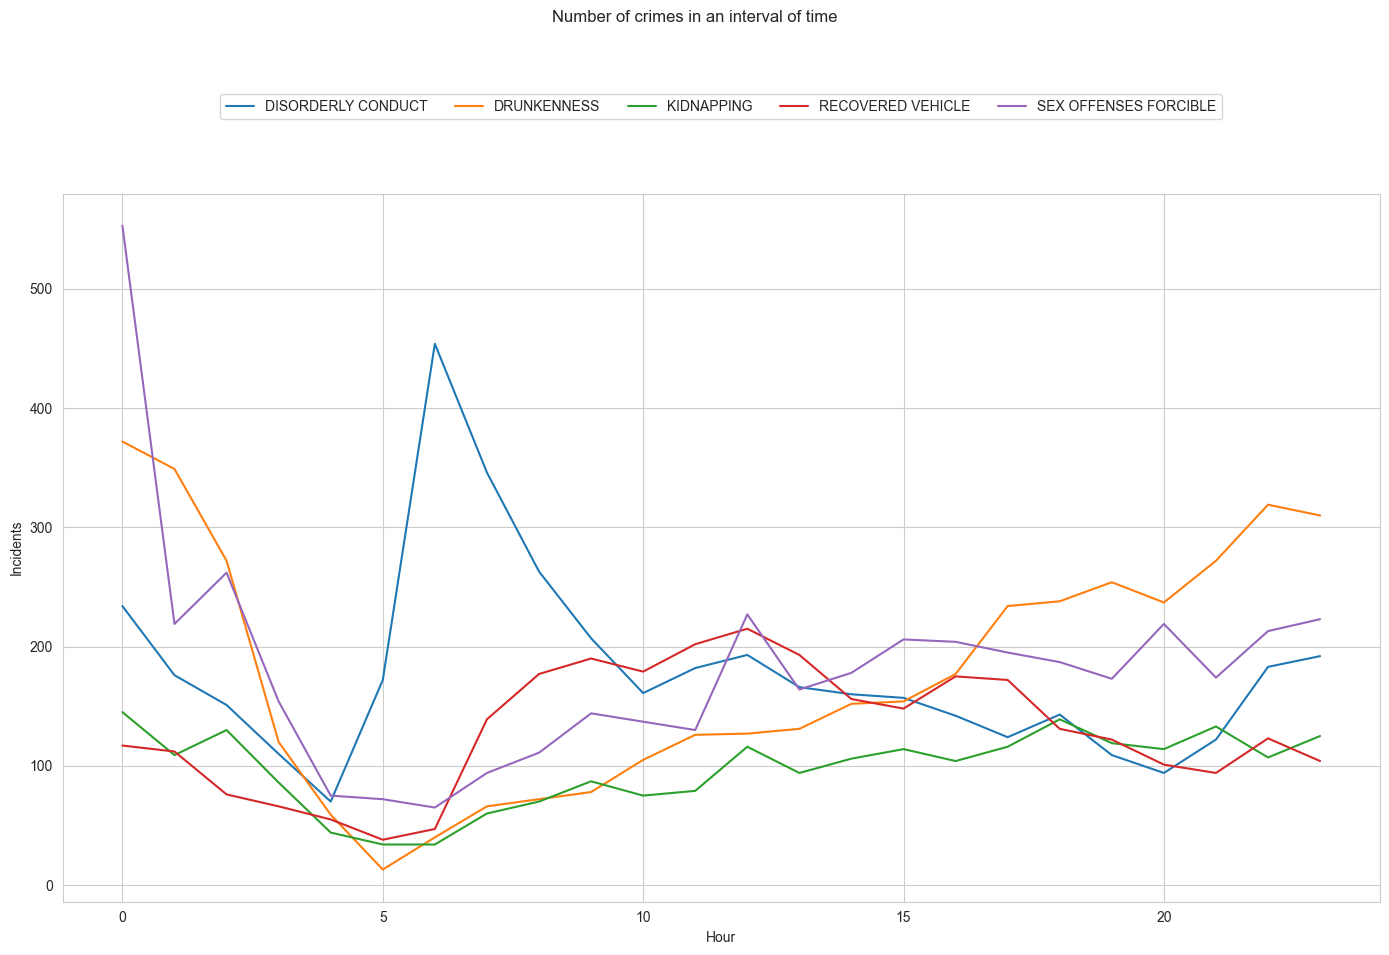

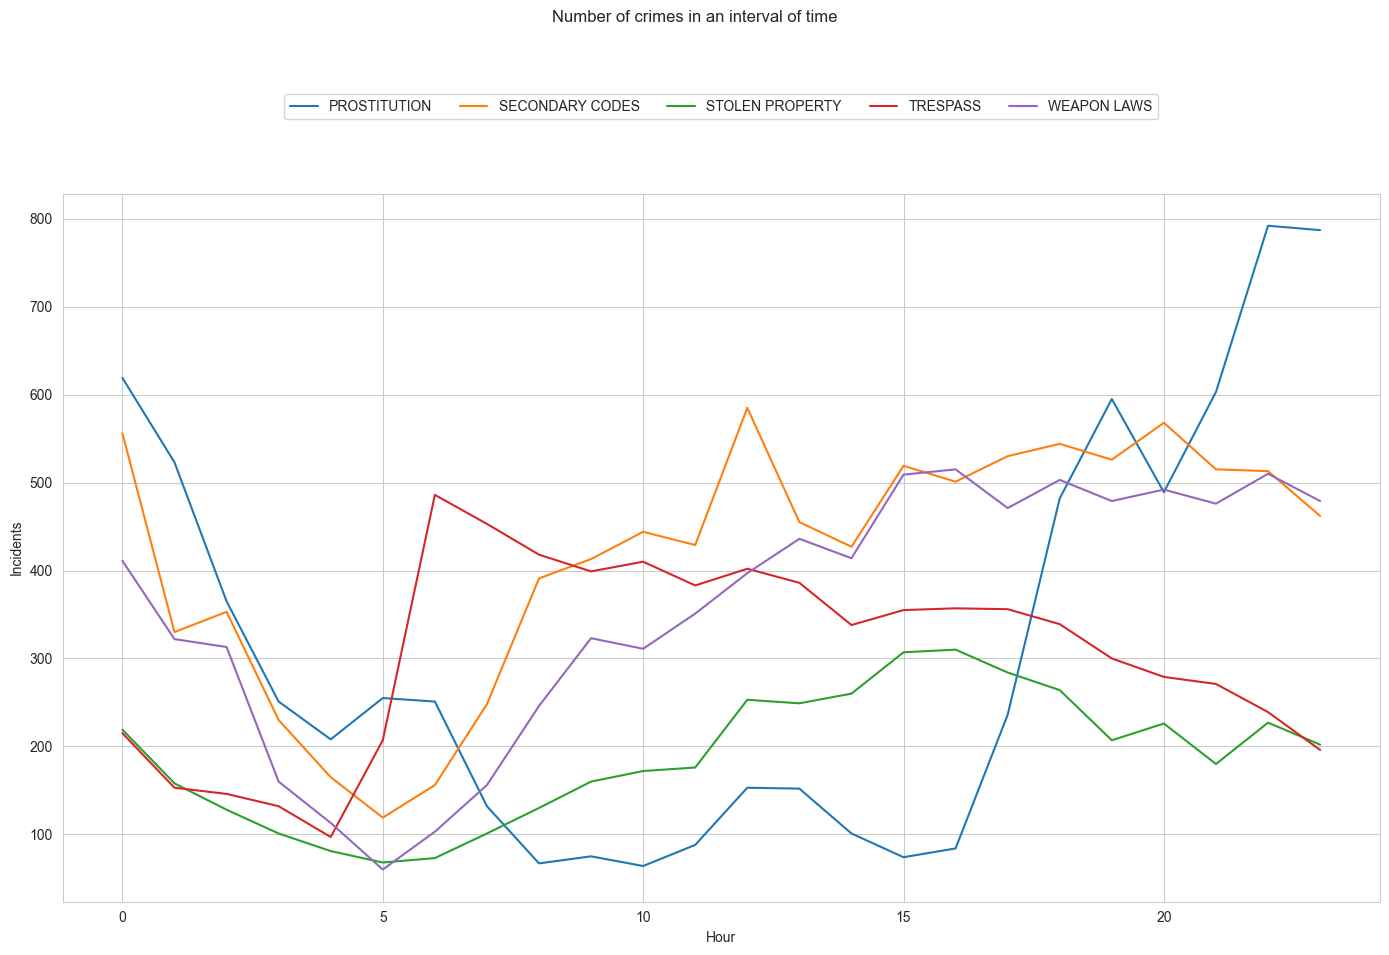

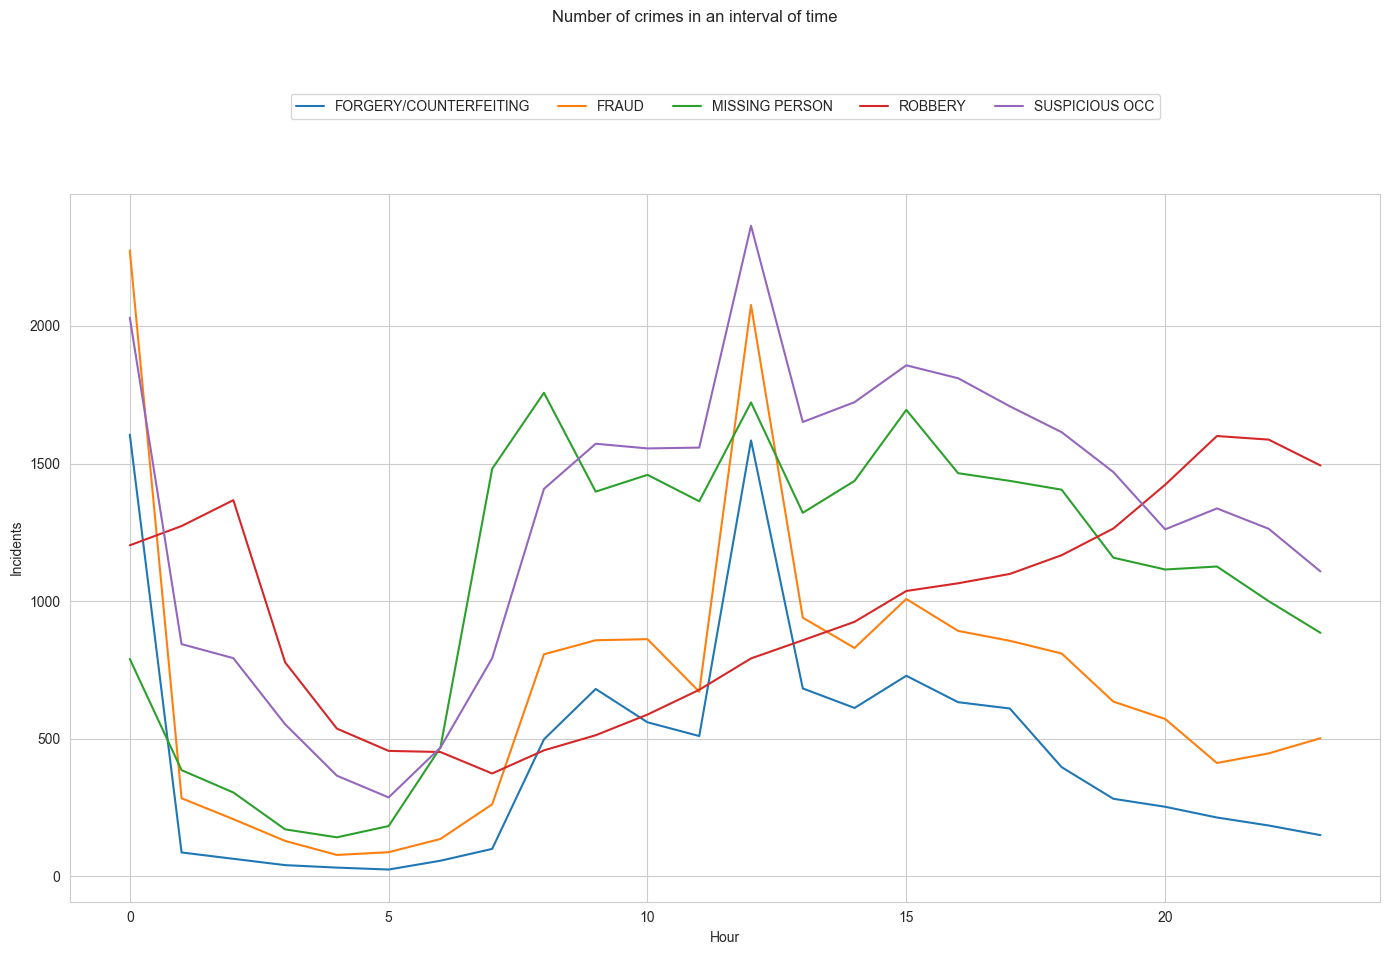

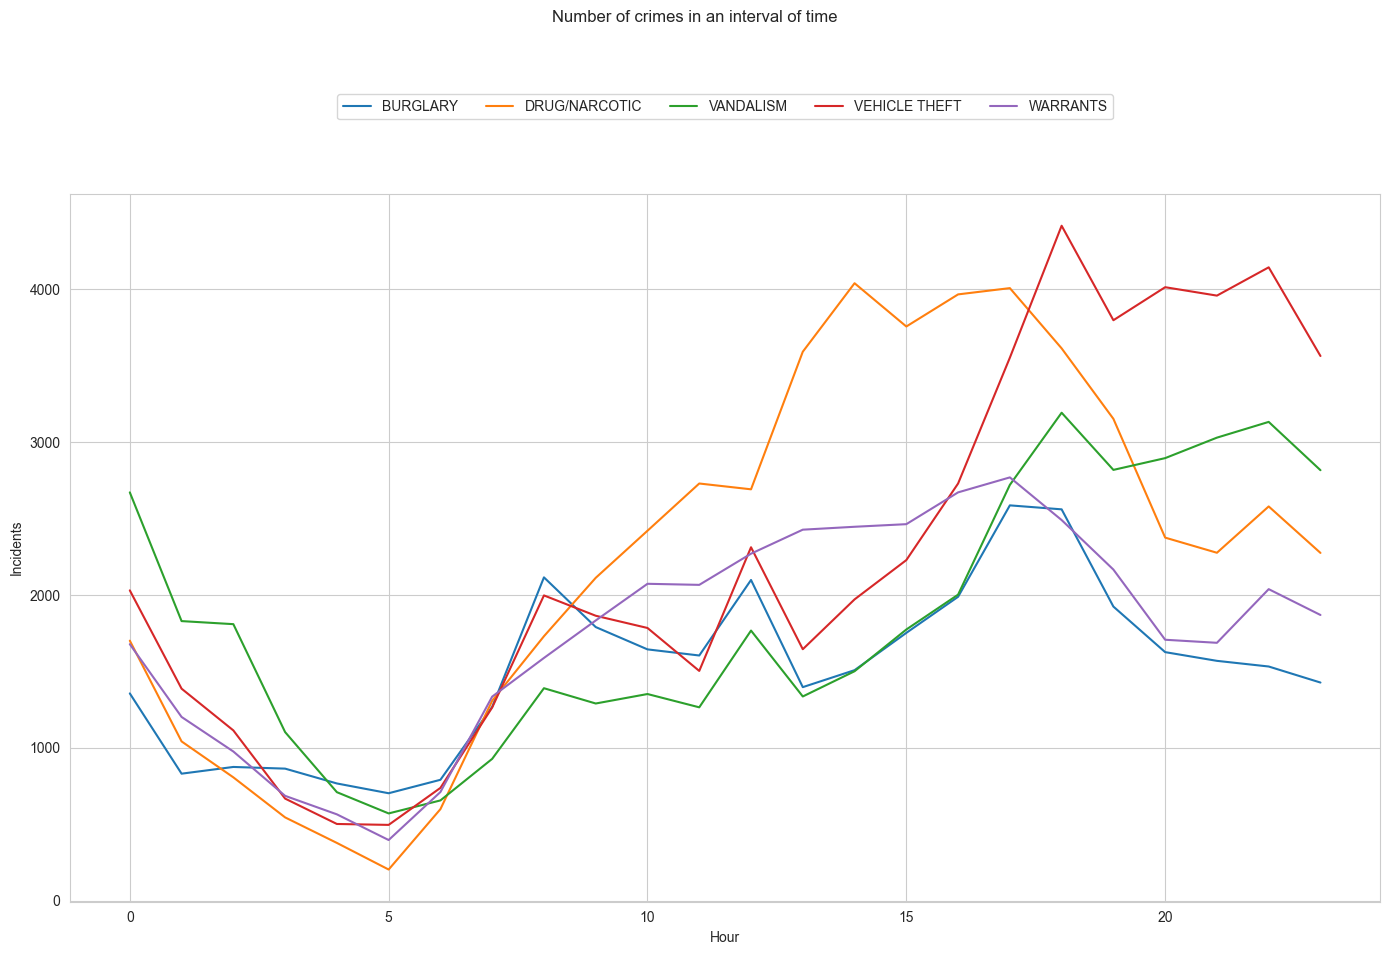

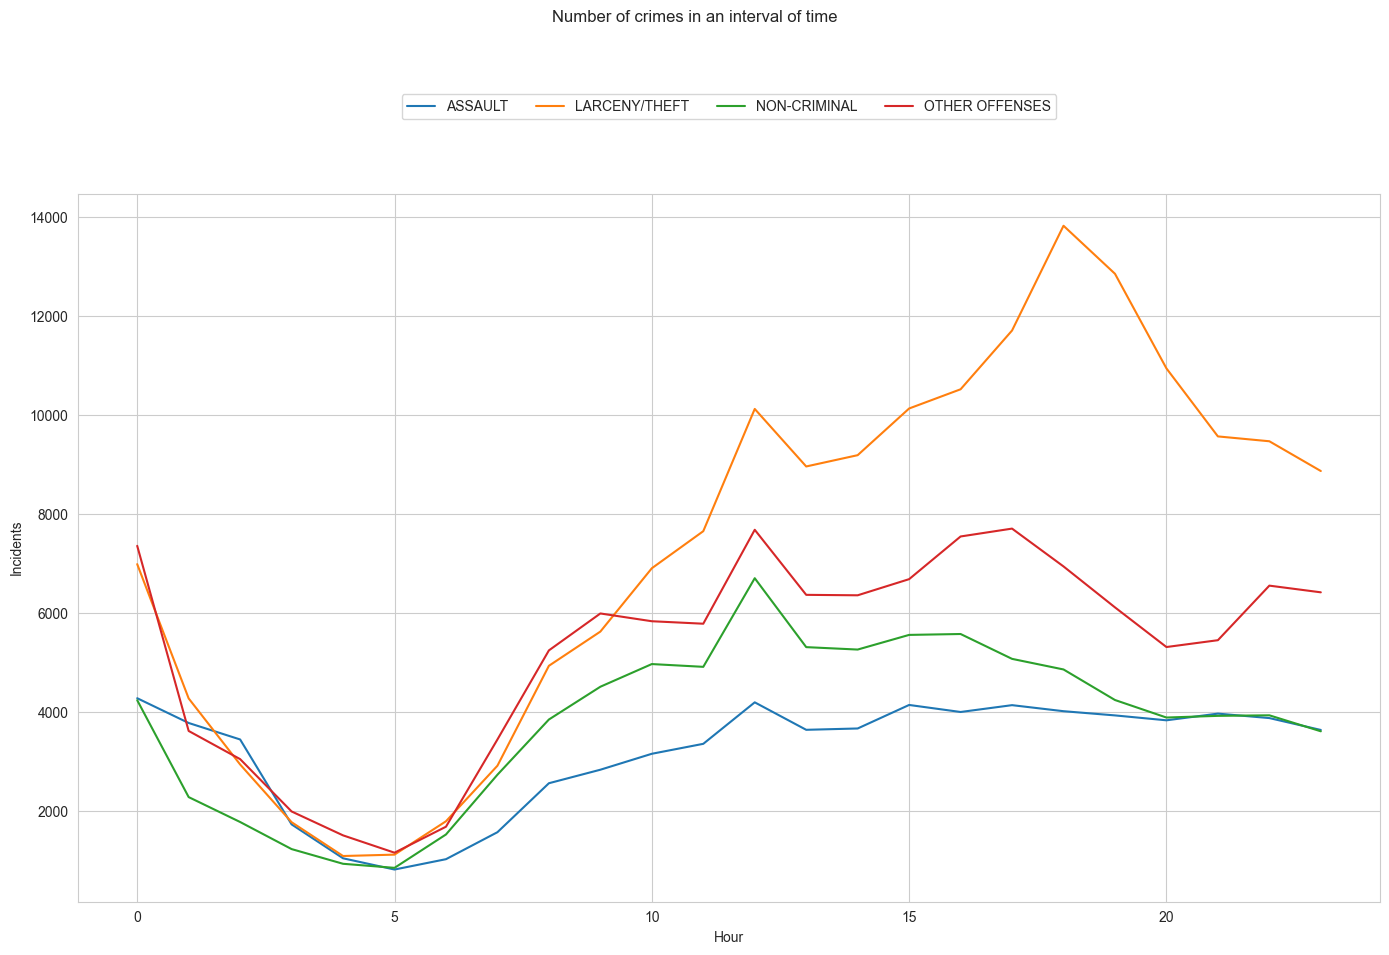

In [29]:
# Let's see how many crimes in different categories occur in different periods of time:
data = df_train.groupby(['Hour', 'Category'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'Dates': 'Incidents'}, inplace=True)

unique_cats = list(data.groupby(['Category']).sum().sort_values(['Incidents']).index)
for i in range(0, len(unique_cats), 5):
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(14, 10))
    ax = sns.lineplot(x='Hour', y='Incidents', data=data[data['Category'].isin(unique_cats[i: i+5])], hue='Category')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
    plt.suptitle('Number of crimes in an interval of time')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'../output/images/Number_of_crimes_{i}.png')
    plt.show()

In [24]:
average_frequency = (df_train.groupby('Category').count())/(df_train.shape[0])
average_frequency.Dates

Category
ARSON                          0.001727
ASSAULT                        0.087718
BAD CHECKS                     0.000464
BRIBERY                        0.000330
BURGLARY                       0.041796
DISORDERLY CONDUCT             0.004923
DRIVING UNDER THE INFLUENCE    0.002590
DRUG/NARCOTIC                  0.061575
DRUNKENNESS                    0.004884
EMBEZZLEMENT                   0.001329
EXTORTION                      0.000292
FAMILY OFFENSES                0.000557
FORGERY/COUNTERFEITING         0.012096
FRAUD                          0.018999
GAMBLING                       0.000167
KIDNAPPING                     0.002672
LARCENY/THEFT                  0.199056
LIQUOR LAWS                    0.002169
LOITERING                      0.001378
MISSING PERSON                 0.029314
NON-CRIMINAL                   0.104962
OTHER OFFENSES                 0.143827
PORNOGRAPHY/OBSCENE MAT        0.000025
PROSTITUTION                   0.008503
RECOVERED VEHICLE              

In [30]:
import contextily as ctx

# Add coordinates to the main file:

geometry2 = [Point(xy) for xy in zip(df_train['X'], df_train['Y'])]

print("Done 1")

# Convert shapefile to GeoDataFrame

geo_df = gpd.read_file('../data/tl_2017_06075_roads/tl_2017_06075_roads.shp')
geo_df = geo_df.to_crs(epsg=3857)

print("Done 2")

# Convert Pandas DataFrame to GeoDataFrame

crime_geo_df = gpd.GeoDataFrame(df_train, geometry=geometry2)

print("Done 3")

# Initialize the crs coordinate system to 4326, projection onto the ellipsoid,
# because in this format data is presented in geometry

crime_geo_df.crs = "EPSG:4326"

# Change crs to Mercator to match coordinate encoding
#San Francisco GeoDataFrame

crime_geo_df = crime_geo_df.to_crs(epsg = 3857)

print("Done 4")

# Map output optimization setting

sns.set_context("paper", font_scale=2)

print("Done 5")

# Create a map

fig, ax = plt.subplots(figsize=(20,20))

# Apply our SF GeoDataFrame layer

geo_df.plot(ax=ax, alpha = .1)

# Draw points of crimes

print("Done 6")

crime_geo_df.plot(ax=ax, column = 'Category', cmap = 'brg', marker = '.', \
                  markersize=100, edgecolor = 'black', alpha=1, legend = True)

print("Done 7")
# Add terrain and features to the map using contextily

ctx.add_basemap(ax, )

# Disable axes with coordinates in Mercator format
# (projected onto a cylinder, axis = earth axis)

ax.set_axis_off()

fig.tight_layout()
plt.title("Transmigration to San Francisco")
plt.savefig('../output/images/SF_crime_areas.png')

Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
